<a href="https://colab.research.google.com/github/mohameddhamed/data-science-intro/blob/main/Task2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CELL 1: Mount Drive
from google.colab import drive
drive.mount('/content/drive')
PROJECT_FOLDER = '/content/drive/MyDrive/ML_Attack_Classifier'

# CELL 2: Load processed dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_pickle(f'{PROJECT_FOLDER}/full_dataset_with_families.pkl')
print(f"✓ Loaded processed dataset")
print(f"Shape: {data.shape}")
print(f"Attack families: {data['Label_family'].unique()}")

Mounted at /content/drive
✓ Loaded processed dataset
Shape: (2830743, 80)
Attack families: ['BENIGN' 'Botnet' 'PortScan' 'BruteForce' 'Infiltration' 'DoS'
 'WebAttack' 'DDoS']


DATASET LOADED
Number of samples: 2,830,743
Number of features: 78
Attack families: 8
Distribution:
Label_family
BENIGN          2273097
DoS              252672
PortScan         158930
DDoS             128027
BruteForce        13835
WebAttack          2180
Botnet             1966
Infiltration         36
Name: count, dtype: int64

DATA CLEANING
Initial missing values: 1358
Columns with ±inf values: ['Flow Bytes/s', 'Flow Packets/s']
Number of columns with infinities: 2
✓ Replaced ±inf → NaN
Filling NaN values with column median...


/tmp/ipython-input-2624370032.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[col].fillna(median_val, inplace=True)


Final NaN count after cleaning: 0
✓ Data cleaning complete!

DESCRIPTIVE STATISTICS (First 10 features)
                                     mean           std   min      50%  \
Destination Port             8.071483e+03  1.828363e+04   0.0     80.0   
Flow Duration                1.478566e+07  3.365374e+07 -13.0  31316.0   
Total Fwd Packets            9.361160e+00  7.496728e+02   1.0      2.0   
Total Backward Packets       1.039377e+01  9.973883e+02   0.0      2.0   
Total Length of Fwd Packets  5.493024e+02  9.993589e+03   0.0     62.0   
Total Length of Bwd Packets  1.616264e+04  2.263088e+06   0.0    123.0   
Fwd Packet Length Max        2.075999e+02  7.171848e+02   0.0     37.0   
Fwd Packet Length Min        1.871366e+01  6.033935e+01   0.0      2.0   
Fwd Packet Length Mean       5.820196e+01  1.860112e+02   0.0     34.0   
Fwd Packet Length Std        6.891013e+01  2.811925e+02   0.0      0.0   

                                      max  
Destination Port             6.553500

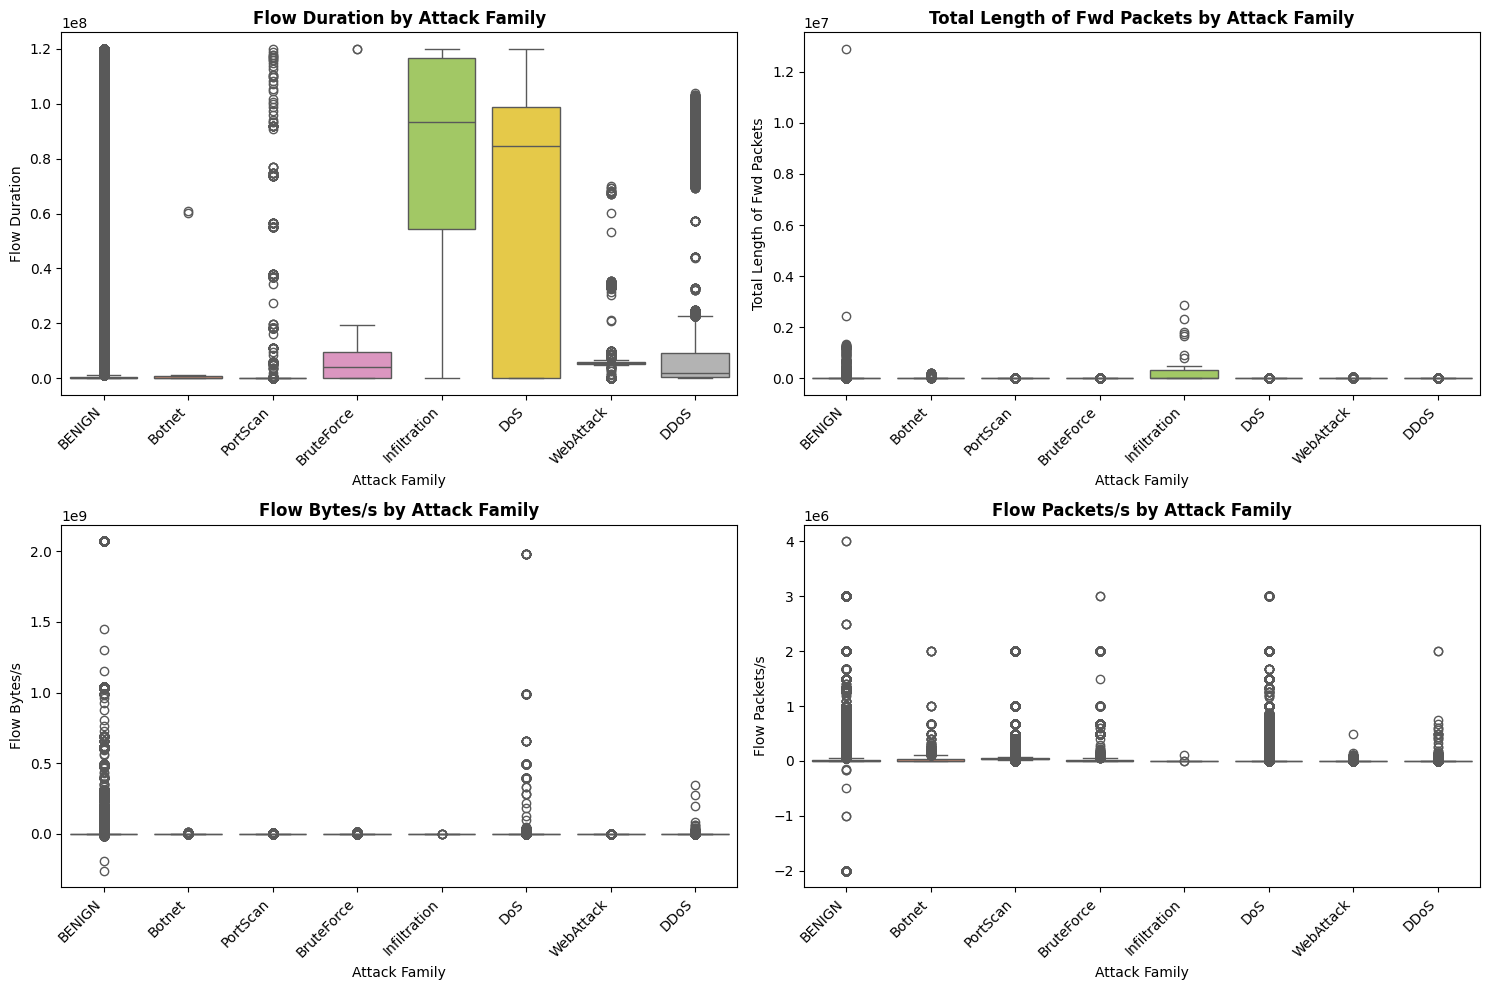

UNIVARIATE ANALYSIS - Creating histograms...
✓ Saved: key_feature_histograms.png


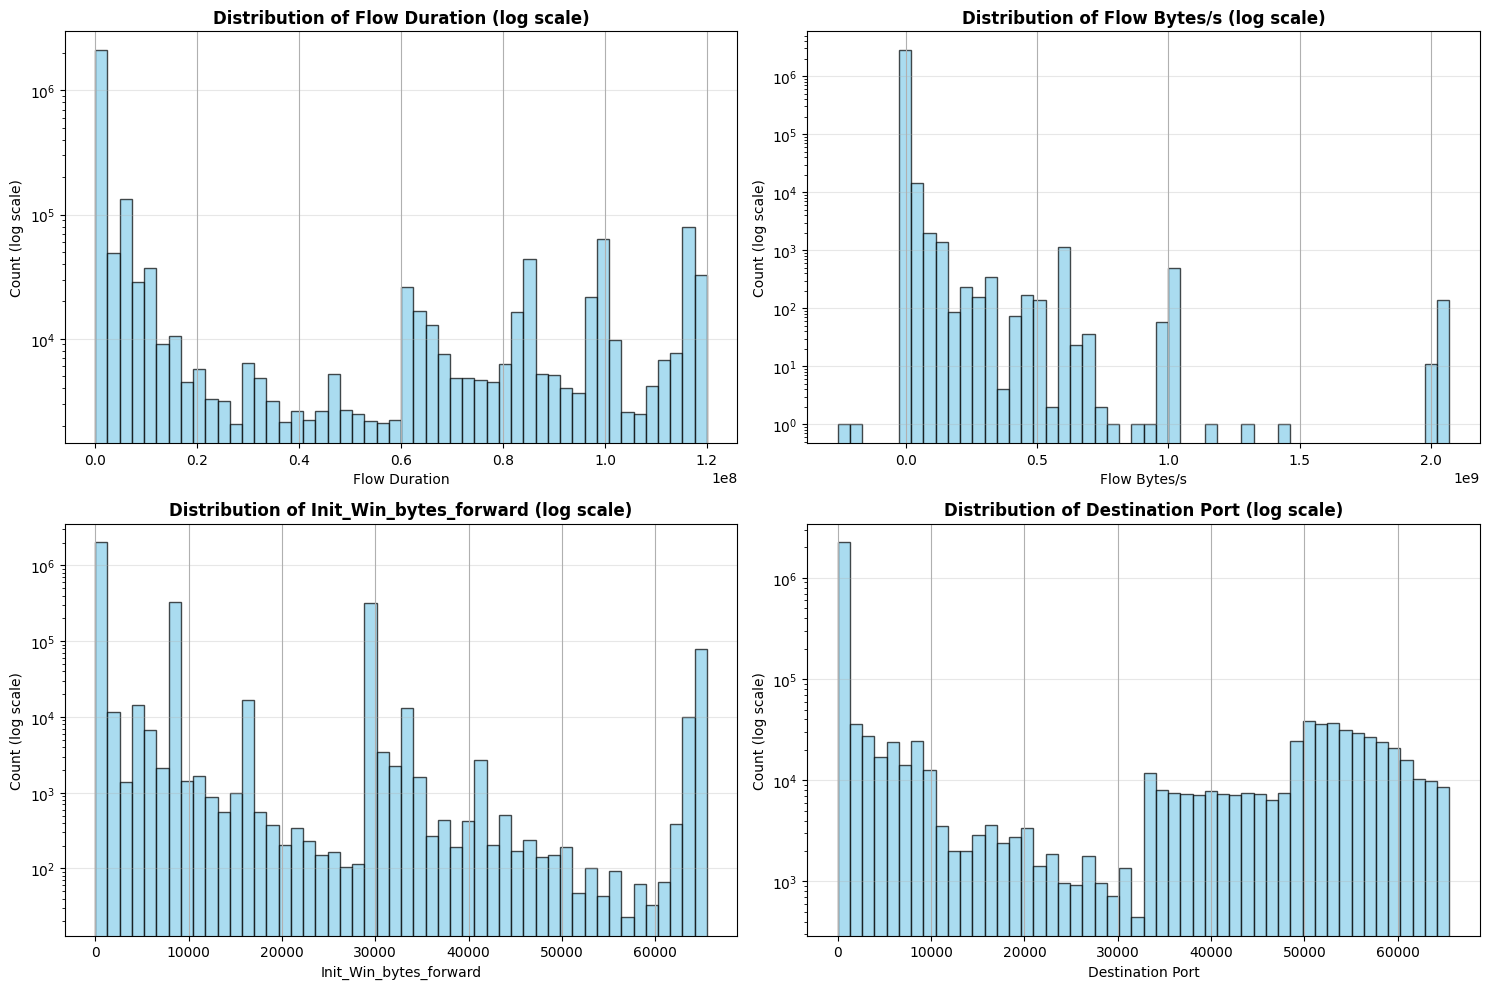

CORRELATION ANALYSIS
Computing correlation matrix...

Top 15 feature pairs with correlation > 0.9:
Total Length of Bwd Packets  Subflow Bwd Bytes              1.000000
Subflow Bwd Bytes            Total Length of Bwd Packets    1.000000
Subflow Fwd Bytes            Total Length of Fwd Packets    0.999999
Total Length of Fwd Packets  Subflow Fwd Bytes              0.999999
Total Fwd Packets            Total Backward Packets         0.999070
Subflow Fwd Packets          Subflow Bwd Packets            0.999070
Total Backward Packets       Subflow Fwd Packets            0.999070
                             Total Fwd Packets              0.999070
Total Fwd Packets            Subflow Bwd Packets            0.999070
Subflow Bwd Packets          Total Fwd Packets              0.999070
                             Subflow Fwd Packets            0.999070
Subflow Fwd Packets          Total Backward Packets         0.999070
Flow Duration                Fwd IAT Total                  0.998560
Fwd 

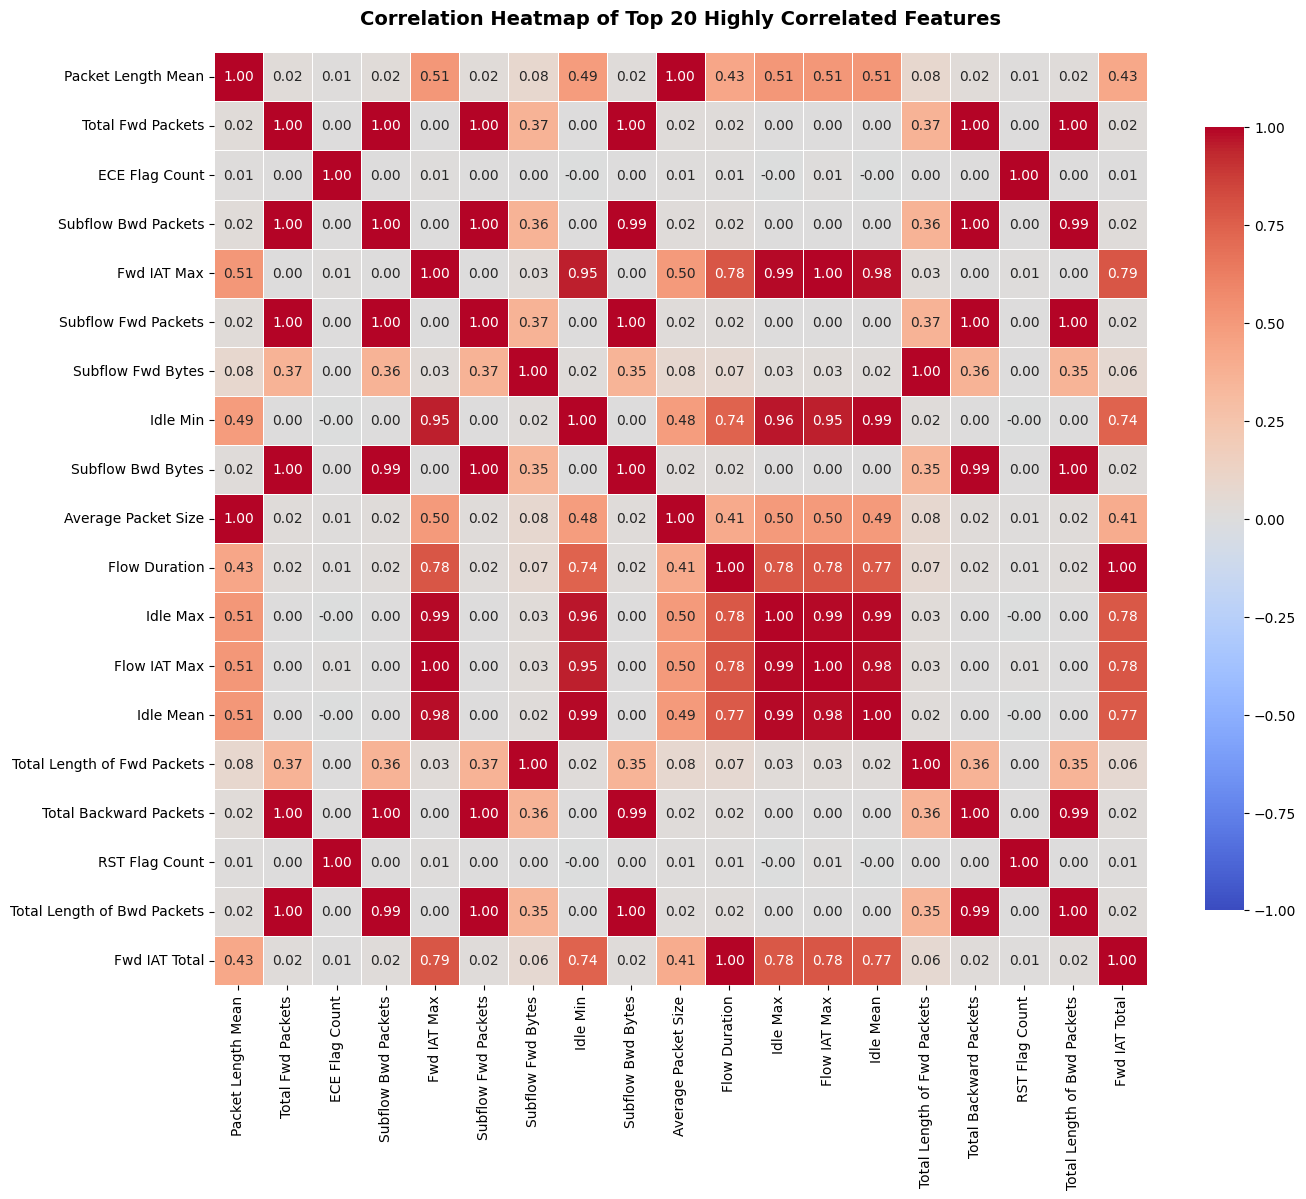

MULTIVARIATE ANALYSIS - PCA
Standardizing features...
✓ Features scaled to mean=0, std=1

Performing 2D PCA...
✓ 2D PCA explained variance: 31.89%
  - PC1: 21.63%
  - PC2: 10.26%

Performing 3D PCA...
✓ 3D PCA explained variance: 40.42%
  - PC1: 21.63%
  - PC2: 10.26%
  - PC3: 8.53%

Creating 2D PCA scatter plot...
✓ Saved: pca_2d.png


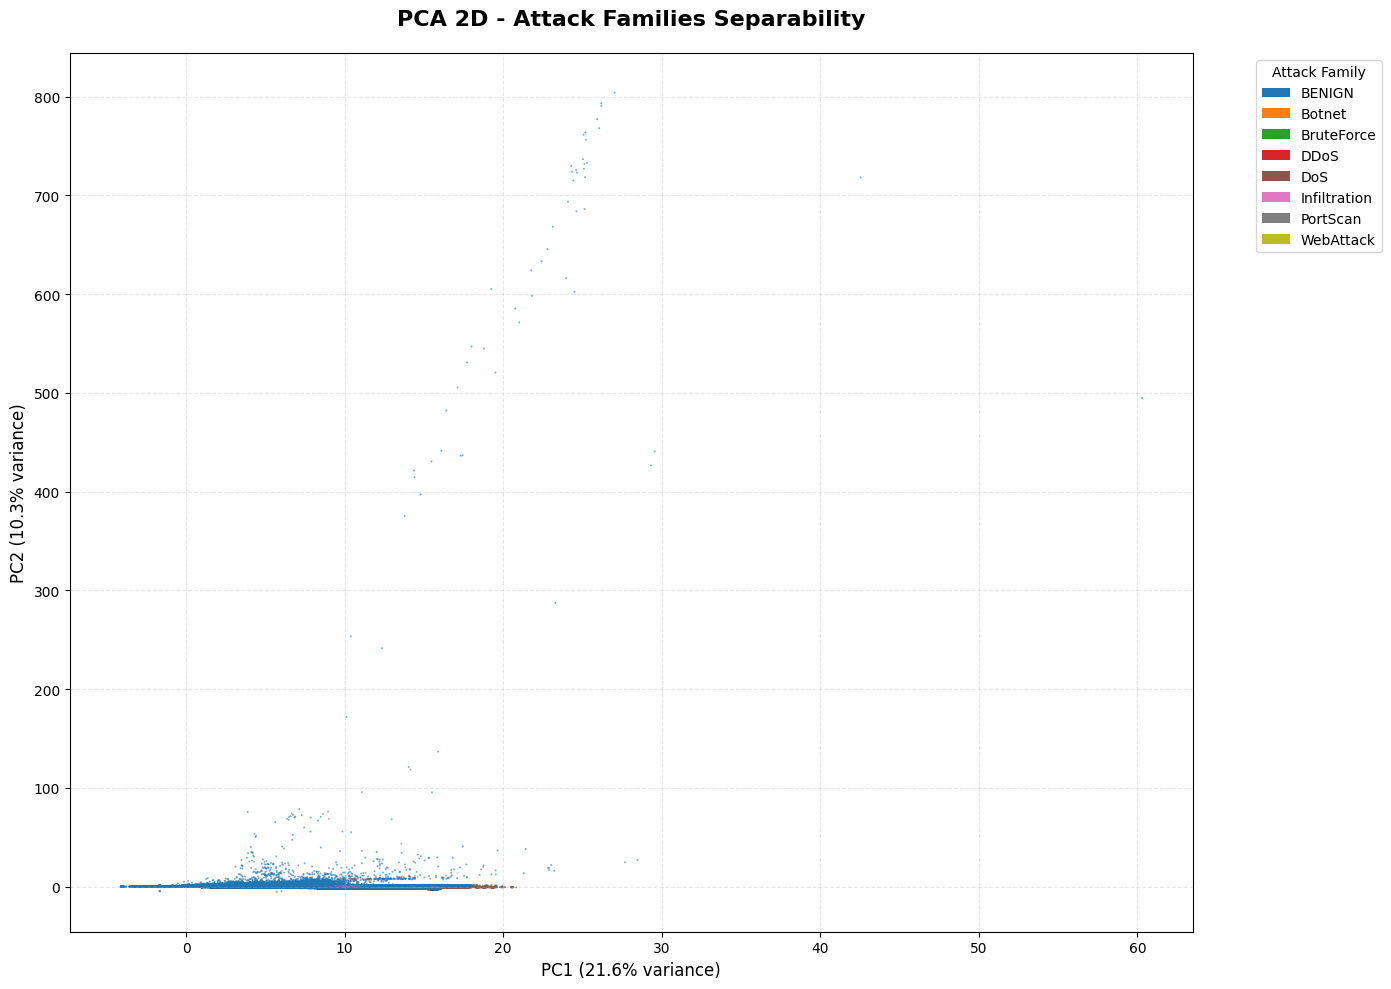

Creating 3D PCA scatter plot...
✓ Saved: pca_3d.png


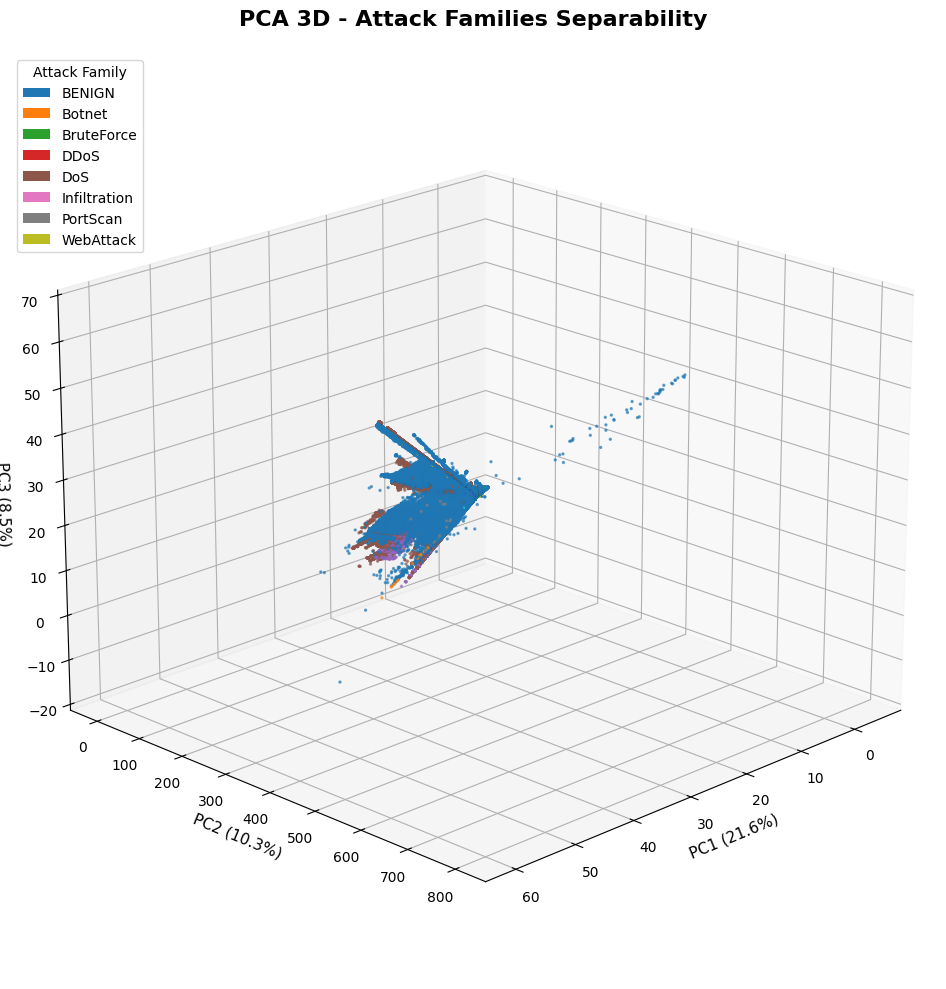


EDA SUMMARY & KEY INSIGHTS

✓ Data Cleaning Complete:
  - Handled 2 columns with infinity values
  - Filled missing values with robust median imputation
  
✓ Outlier Analysis:
  - Boxplots reveal attack families have distinct distributions
  - Some attacks (e.g., DoS) show extreme outliers in flow metrics
  
✓ Correlation Analysis:
  - Found 64 highly correlated feature pairs (>0.9)
  - Suggests potential for dimensionality reduction
  
✓ PCA Analysis:
  - 2D PCA captures 31.9% of variance
  - 3D PCA captures 40.4% of variance
  - Attack families show SOME separation but significant overlap
  
💡 Key Takeaway: 
   Attack families are partially separable in reduced dimensions,
   suggesting machine learning can distinguish them, but perfect
   separation is unlikely. Feature engineering will be crucial!

TASK 2 DELIVERABLES COMPLETED ✓
✓ Descriptive statistics computed
✓ Missing values & infinities handled
✓ Outlier detection (boxplots)
✓ Univariate analysis (histograms)
✓ Correlation a

In [2]:
# ============================================================================
# TASK 2 — EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================
# This notebook performs comprehensive EDA including:
# - Descriptive statistics
# - Missing value and infinity handling
# - Outlier detection
# - Univariate analysis (histograms)
# - Correlation analysis
# - Multivariate analysis (PCA)
# ============================================================================

# Import required libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch

# ============================================================================
# SECTION 1: LOAD DATA & INITIAL INSPECTION
# ============================================================================

# Load the processed dataset with attack families from Task 1
# data = pd.read_pickle("full_dataset_with_families.pkl")

# Separate features (X) and target (y)
y = data["Label_family"]  # Target: attack family labels
x = data.drop(["Label", "Label_family"], axis=1)  # Features: all network traffic metrics

print("="*70)
print("DATASET LOADED")
print("="*70)
print(f"Number of samples: {x.shape[0]:,}")
print(f"Number of features: {x.shape[1]}")
print(f"Attack families: {y.nunique()}")
print(f"Distribution:\n{y.value_counts()}\n")

# ============================================================================
# SECTION 2: DATA CLEANING - MISSING VALUES & INFINITIES
# ============================================================================

print("="*70)
print("DATA CLEANING")
print("="*70)

# Check for missing values
print(f"Initial missing values: {data.isnull().sum().sum()}")

# Check for infinity values (common in network data due to division by zero)
inf_cols = x.columns[(x == np.inf).any() | (x == -np.inf).any()]
print(f"Columns with ±inf values: {list(inf_cols)}")
print(f"Number of columns with infinities: {len(inf_cols)}")

# Replace infinities with NaN for uniform handling
x.replace([np.inf, -np.inf], np.nan, inplace=True)
print("✓ Replaced ±inf → NaN")

# Fill NaN values with median (robust to outliers, better than mean for skewed data)
print("Filling NaN values with column median...")
for col in x.columns:
    if x[col].isnull().any():
        median_val = x[col].median()
        x[col].fillna(median_val, inplace=True)

print(f"Final NaN count after cleaning: {x.isnull().sum().sum()}")  # Should be 0
print("✓ Data cleaning complete!\n")

# ============================================================================
# SECTION 3: DESCRIPTIVE STATISTICS
# ============================================================================

print("="*70)
print("DESCRIPTIVE STATISTICS (First 10 features)")
print("="*70)
# Show key statistics: mean, std, min, median (50%), max
print(x.describe().T[["mean", "std", "min", "50%", "max"]].head(10))
print()

# ============================================================================
# SECTION 4: OUTLIER DETECTION - BOXPLOTS
# ============================================================================

print("="*70)
print("OUTLIER DETECTION - Creating boxplots...")
print("="*70)

# Select key features that are likely to show attack patterns
key_features = [
    "Flow Duration",              # How long the connection lasted
    "Total Length of Fwd Packets", # Total bytes sent forward
    "Flow Bytes/s",               # Rate of data transfer
    "Flow Packets/s",             # Rate of packet sending
]

# Create 2x2 grid of boxplots
plt.figure(figsize=(15, 10))
for i, feat in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    # Boxplot shows distribution and outliers for each attack family
    sns.boxplot(
        y=x[feat],
        x=y,
        hue=y,
        palette="Set2",
        legend=False
    )
    plt.title(f"{feat} by Attack Family", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(feat)
    plt.xlabel("Attack Family")

plt.tight_layout()
plt.savefig("key_feature_boxplots.png", dpi=300, bbox_inches="tight")
print("✓ Saved: key_feature_boxplots.png")
plt.show()

# ============================================================================
# SECTION 5: UNIVARIATE ANALYSIS - HISTOGRAMS
# ============================================================================

print("="*70)
print("UNIVARIATE ANALYSIS - Creating histograms...")
print("="*70)

# Select features with wide value ranges
hist_features = [
    "Flow Duration",
    "Flow Bytes/s",
    "Init_Win_bytes_forward",  # Initial TCP window size
    "Destination Port",
]

plt.figure(figsize=(15, 10))
for i, feat in enumerate(hist_features, 1):
    plt.subplot(2, 2, i)
    # Log scale helps visualize data spanning many orders of magnitude
    x[feat].hist(
        bins=50,
        log=True,  # Log scale on y-axis
        alpha=0.7,
        color="skyblue",
        edgecolor="black"
    )
    plt.title(f"Distribution of {feat} (log scale)", fontweight='bold')
    plt.xlabel(feat)
    plt.ylabel("Count (log scale)")
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig("key_feature_histograms.png", dpi=300)
print("✓ Saved: key_feature_histograms.png")
plt.show()

# ============================================================================
# SECTION 6: CORRELATION ANALYSIS
# ============================================================================

print("="*70)
print("CORRELATION ANALYSIS")
print("="*70)

# Compute full correlation matrix
print("Computing correlation matrix...")
corr = x.corr()

# Find highly correlated feature pairs (may indicate redundancy)
high_corr = corr.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr > 0.9]   # Keep only strong correlations
high_corr = high_corr[high_corr < 1.0]   # Remove self-correlation (always 1.0)

print("\nTop 15 feature pairs with correlation > 0.9:")
print(high_corr.head(15))
print("\n💡 High correlation suggests features contain similar information")
print("   Consider removing redundant features in feature engineering!\n")

# ============================================================================
# SECTION 7: CORRELATION HEATMAP
# ============================================================================

print("Creating correlation heatmap...")

# Extract top 20 most correlated features for visualization
top_corr_pairs = high_corr.head(40)
top_features = set()
for idx in top_corr_pairs.index:
    top_features.update(idx)  # Collect unique feature names
top_features = list(top_features)[:20]  # Limit to 20 for readability

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    x[top_features].corr(),
    annot=True,           # Show correlation values
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # Red = positive, Blue = negative
    cbar_kws={"shrink": 0.8},
    square=True,          # Square cells
    linewidths=0.5,       # Grid lines
    center=0,             # Center colormap at 0
    vmin=-1, vmax=1       # Correlation range
)
plt.title("Correlation Heatmap of Top 20 Highly Correlated Features",
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
print("✓ Saved: correlation_heatmap.png")
plt.show()

# ============================================================================
# SECTION 8: MULTIVARIATE ANALYSIS - PCA
# ============================================================================

print("="*70)
print("MULTIVARIATE ANALYSIS - PCA")
print("="*70)

# PCA requires standardized features (mean=0, std=1)
print("Standardizing features...")
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print("✓ Features scaled to mean=0, std=1\n")

# --- 2D PCA ---
print("Performing 2D PCA...")
pca2 = PCA(n_components=2)
x_pca2 = pca2.fit_transform(x_scaled)
variance_2d = pca2.explained_variance_ratio_.sum()
print(f"✓ 2D PCA explained variance: {variance_2d:.2%}")
print(f"  - PC1: {pca2.explained_variance_ratio_[0]:.2%}")
print(f"  - PC2: {pca2.explained_variance_ratio_[1]:.2%}\n")

# --- 3D PCA ---
print("Performing 3D PCA...")
pca3 = PCA(n_components=3)
x_pca3 = pca3.fit_transform(x_scaled)
variance_3d = pca3.explained_variance_ratio_.sum()
print(f"✓ 3D PCA explained variance: {variance_3d:.2%}")
print(f"  - PC1: {pca3.explained_variance_ratio_[0]:.2%}")
print(f"  - PC2: {pca3.explained_variance_ratio_[1]:.2%}")
print(f"  - PC3: {pca3.explained_variance_ratio_[2]:.2%}\n")

# ============================================================================
# SECTION 9: PCA 2D VISUALIZATION
# ============================================================================

print("Creating 2D PCA scatter plot...")

# Convert labels to numeric codes for coloring
label_codes = y.astype("category").cat.codes
unique_labels = y.astype("category").cat.categories

# Create scatter plot
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    x_pca2[:, 0],
    x_pca2[:, 1],
    c=label_codes,
    cmap="tab10",        # Colormap with distinct colors
    alpha=0.6,           # Transparency to see overlapping points
    s=2,                 # Small point size for large dataset
    edgecolors="none"
)

# Create custom legend with attack family names
legend_elements = [
    Patch(facecolor=plt.cm.tab10(i / len(unique_labels)), label=label)
    for i, label in enumerate(unique_labels)
]
plt.legend(
    handles=legend_elements,
    title="Attack Family",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    frameon=True,
    fancybox=True
)

plt.title("PCA 2D - Attack Families Separability", fontsize=16, fontweight='bold', pad=20)
plt.xlabel(f"PC1 ({pca2.explained_variance_ratio_[0]:.1%} variance)", fontsize=12)
plt.ylabel(f"PC2 ({pca2.explained_variance_ratio_[1]:.1%} variance)", fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig("pca_2d.png", dpi=300, bbox_inches="tight")
print("✓ Saved: pca_2d.png")
plt.show()

# ============================================================================
# SECTION 10: PCA 3D VISUALIZATION
# ============================================================================

print("Creating 3D PCA scatter plot...")

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")

# 3D scatter
sc = ax.scatter(
    x_pca3[:, 0],
    x_pca3[:, 1],
    x_pca3[:, 2],
    c=label_codes,
    cmap="tab10",
    alpha=0.6,
    s=2
)

# Legend
legend_elements = [
    Patch(facecolor=plt.cm.tab10(i / len(unique_labels)), label=label)
    for i, label in enumerate(unique_labels)
]
ax.legend(
    handles=legend_elements,
    title="Attack Family",
    loc="upper left",
    frameon=True,
    fancybox=True
)

ax.set_title("PCA 3D - Attack Families Separability", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel(f"PC1 ({pca3.explained_variance_ratio_[0]:.1%})", fontsize=11)
ax.set_ylabel(f"PC2 ({pca3.explained_variance_ratio_[1]:.1%})", fontsize=11)
ax.set_zlabel(f"PC3 ({pca3.explained_variance_ratio_[2]:.1%})", fontsize=11)

# Rotate for better initial view
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.savefig("pca_3d.png", dpi=300, bbox_inches="tight")
print("✓ Saved: pca_3d.png")
plt.show()

# ============================================================================
# SECTION 11: EDA INSIGHTS & SUMMARY
# ============================================================================

print("\n" + "="*70)
print("EDA SUMMARY & KEY INSIGHTS")
print("="*70)

print(f"""
✓ Data Cleaning Complete:
  - Handled {len(inf_cols)} columns with infinity values
  - Filled missing values with robust median imputation

✓ Outlier Analysis:
  - Boxplots reveal attack families have distinct distributions
  - Some attacks (e.g., DoS) show extreme outliers in flow metrics

✓ Correlation Analysis:
  - Found {len(high_corr)//2} highly correlated feature pairs (>0.9)
  - Suggests potential for dimensionality reduction

✓ PCA Analysis:
  - 2D PCA captures {variance_2d:.1%} of variance
  - 3D PCA captures {variance_3d:.1%} of variance
  - Attack families show SOME separation but significant overlap

💡 Key Takeaway:
   Attack families are partially separable in reduced dimensions,
   suggesting machine learning can distinguish them, but perfect
   separation is unlikely. Feature engineering will be crucial!
""")

print("="*70)
print("TASK 2 DELIVERABLES COMPLETED ✓")
print("="*70)
print("✓ Descriptive statistics computed")
print("✓ Missing values & infinities handled")
print("✓ Outlier detection (boxplots)")
print("✓ Univariate analysis (histograms)")
print("✓ Correlation analysis & heatmap")
print("✓ PCA 2D & 3D visualizations")
print("\n📊 All plots saved successfully!")
print("="*70)

In [3]:
# ============================================================================
# SAVE EVERYTHING TO GOOGLE DRIVE
# ============================================================================

print("\n" + "="*70)
print("SAVING TO GOOGLE DRIVE")
print("="*70)

# Save cleaned data for Task 3
data_cleaned = pd.concat([x, y], axis=1)
data_cleaned.to_pickle(f'{PROJECT_FOLDER}/data_cleaned_task2.pkl')
print("✓ Saved: data_cleaned_task2.pkl")

# Save all plots to Google Drive
import shutil
plots = [
    'key_feature_boxplots.png',
    'key_feature_histograms.png',
    'correlation_heatmap.png',
    'pca_2d.png',
    'pca_3d.png'
]

for plot in plots:
    try:
        shutil.copy(plot, f'{PROJECT_FOLDER}/{plot}')
        print(f"✓ Saved: {plot}")
    except Exception as e:
        print(f"⚠ Could not save {plot}: {e}")

print("\n🎉 Task 2 Complete! All files saved to Google Drive")
print("="*70)


SAVING TO GOOGLE DRIVE
✓ Saved: data_cleaned_task2.pkl
✓ Saved: key_feature_boxplots.png
✓ Saved: key_feature_histograms.png
✓ Saved: correlation_heatmap.png
✓ Saved: pca_2d.png
✓ Saved: pca_3d.png

🎉 Task 2 Complete! All files saved to Google Drive
